## Импорт библиотек

## Теоретические вопросы

#### 1.2

In [47]:
a = [1,2,3]
b = a
c = [1,2,3]
print(a == b, a == c, a is b, a is c)

True True True False


#### 1.4

In [48]:
one = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")
one.append(5)
one.extend(two)

#### 1.5

In [49]:
my_lst = [1, 2, 3, 4]
my_lst = my_lst[:, :, -1]
print(my_lst)

TypeError: list indices must be integers or slices, not tuple

#### 1.11

In [ ]:
temperature = 99
remaining_time = 12
"Температура: {temperature}, оставшееся время: {remaining_time}".format()



KeyError: 'temperature'

#### 1.12

In [ ]:
s = '21413204913487'
s.isalnum()

True

## 2. Практические задания в Codeboard

#### 2.1
Вам предоставлен словарь products, ключами которого являются названия продуктов, а значениями — их цены. Затем вы получаете другой словарь (stocks), ключи которого — товары, а значения — скидки (в процентах) на товары.

Напишите функцию apply_discounts(), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены. Если продукта из словаря products нет в словаре stocks, то скидка к нему не применяется. Цены округлите до второго знака после запятой.

In [ ]:
def apply_discounts(products, stocks):
    """
    Напишите функцию apply_discounts(), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. 
    Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены.
    Если продукта из словаря stocks нет в словаре products, то его необходимо пропустить. Цены округлите до второго знака после запятой.
    """
    new = {}
    for name_product in products:
        if name_product in stocks:
            new[name_product] = round(products[name_product] / 100 * (100 - int(stocks[name_product][:2])),2)
        else:
            new[name_product] = products[name_product]   
    return new

    
if __name__ == '__main__':
    products={
        "Oranges (packaged)": 114.99, 
        "Candy (Rotfront)": 280.00,
        "Boiled sausage": 199.99,
        "Juice J7 (orange)": 119.99,
        "Trout (Seven Seas)": 399.99
        }
    stocks = {
        "Boiled sausage": "33%",
        "Juice J7 (orange)": "12%",
        "Trout (Seven Seas)": "18%"
    }
    new_products = apply_discounts(products, stocks)
    print(new_products)

{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


#### 2.2
Вам даны два файла, bronze_top и silver_top (пути к ним заданы в Codeboard), в которых хранится информация о ТОП-5 стран по числу бронзовых и серебряных медалей соответственно. В каждой таблице два одинаковых столбца: Country — страна и Total — число медалей. 

Объедините две таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые попали в оба рейтинга. При этом в качестве суффиксов укажите строки "_bronze" и "_silver", чтобы столбцы таблиц, не участвовавших в объединении, можно было различать.

Результат занесите в переменную merged.

In [ ]:
import pandas as pd

bronze_path = 'data/bronze_top.csv'
silver_path = 'data/silver_top.csv'
bronze = pd.read_csv(bronze_path)
silver = pd.read_csv(silver_path)
display(bronze)
display(silver)
"""
Объедините две таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые есть в обоих рейтингах. 
При этом в качестве суффиксов для столбца c числом медалей укажите строки "_bronze" и "_silver", чтобы столбцы можно было различать.
Результат занесите в переменную merged.
"""
merged = bronze.merge(silver, on='Country', suffixes=('_bronze','_silver'))

display(merged)

,Country,Total
0,United States,1052.0
1,Soviet Union,584.0
2,United Kingdom,505.0
3,France,475.0
4,Germany,454.0


,Country,Total
0,United States,1195.0
1,Soviet Union,627.0
2,United Kingdom,591.0
3,France,461.0
4,Italy,394.0


,Country,Total_bronze,Total_silver
0,United States,1052.0,1195.0
1,Soviet Union,584.0,627.0
2,United Kingdom,505.0,591.0
3,France,475.0,461.0


## 3. Практические задания в Jupyter Notebook

In [62]:
from datetime import datetime
import pandas as pd
solar_data = pd.read_csv('data/solarpower.csv')
display(solar_data)
display(solar_data.info())


,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


None

#### 3.1

In [57]:
for i in range(len(solar_data['cum_power'])):
    if solar_data['cum_power'][i] == -1:
        solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2
        print(i)
display(round(solar_data['cum_power'].mean()))

45
647


C:\Users\Женя\AppData\Local\Temp\ipykernel_31328\1570300184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2


23848

#### 3.2

In [79]:
s_pred = solar_data['cum_power'][0]
solar_data['day_power'] = 0
#for i in range(1,5):
for i in range(len(solar_data['cum_power'])):
    s = solar_data['cum_power'][i]
#    print(s, s_pred)
    solar_data['day_power'][i] = s - s_pred
    s_pred = solar_data['cum_power'][i]
    
display(solar_data)

C:\Users\Женя\AppData\Local\Temp\ipykernel_31328\2429018309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['day_power'][i] = s - s_pred


,date,cum_power,month,mounth,day_power
0,2017-01-01,20111.0,2017-01-01,2017-01,0
1,2017-01-02,20112.0,2017-01-02,2017-01,1
2,2017-01-03,20115.0,2017-01-03,2017-01,3
3,2017-01-04,20117.0,2017-01-04,2017-01,2
4,2017-01-05,20119.0,2017-01-05,2017-01,2
...,...,...,...,...,...
659,2018-10-22,28101.0,2018-10-22,2018-10,6
660,2018-10-23,28109.0,2018-10-23,2018-10,8
661,2018-10-24,28115.0,2018-10-24,2018-10,6
662,2018-10-25,28117.0,2018-10-25,2018-10,2


In [80]:
solar_data['date'] = pd.to_datetime(solar_data['date'])
solar_data['mounth'] = solar_data['date'].dt.to_period('M')
solar_group = solar_data.groupby('mounth')['day_power'].mean()
display(solar_group)

mounth
2017-01     3.129032
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

##### 3.3


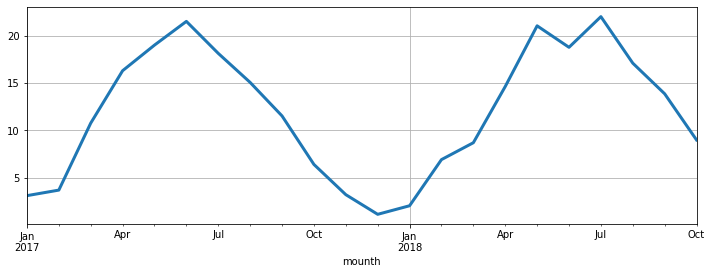

In [82]:

solar_group.plot(
    kind='line',
    figsize=(12, 4),
#    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);